In [2]:
!pip install pandas matplotlib requests

In [3]:
import requests
import pandas as pd

In [4]:
url = 'https://api.blockchain.info/charts/estimated-transaction-volume?timespan=all&format=json'

In [5]:
response = requests.get(url)
data = response.json()

In [6]:
# Parse data
df = pd.DataFrame(data['values'])
df['x'] = pd.to_datetime(df['x'], unit='s')  # Convert timestamp to datetime
df.rename(columns={'x': 'Date', 'y': 'TransactionVolume'}, inplace=True)

In [7]:
print(df.head())

        Date  TransactionVolume
0 2010-08-28       12313.279998
1 2010-09-01       16838.340000
2 2010-09-05       30472.940000
3 2010-09-09       17065.420000
4 2010-09-13       28146.850000


Visualize Transaction Volume Trends

In [9]:
import matplotlib.pyplot as plt

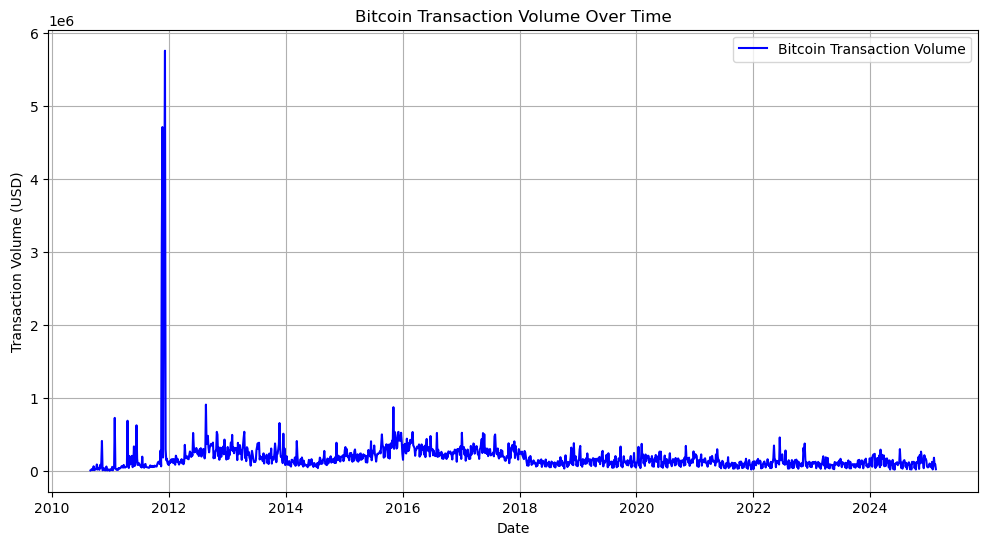

In [10]:
# Plot transaction volume
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['TransactionVolume'], label='Bitcoin Transaction Volume', color='blue')
plt.title('Bitcoin Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Volume (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Calculate rolling mean and standard deviation
df['RollingMean'] = df['TransactionVolume'].rolling(window=30).mean()
df['RollingStd'] = df['TransactionVolume'].rolling(window=30).std()

In [12]:
# Identify spikes (volume > mean + 2 * std)
df['IsSpike'] = df['TransactionVolume'] > (df['RollingMean'] + 2 * df['RollingStd'])

In [13]:
# Filter spike days
spike_days = df[df['IsSpike']]
print(spike_days[['Date', 'TransactionVolume']])

           Date  TransactionVolume
38   2011-01-27       7.318930e+05
58   2011-04-17       6.929794e+05
72   2011-06-12       6.303417e+05
106  2011-11-09       2.843255e+05
108  2011-11-17       3.081421e+06
...         ...                ...
1220 2024-01-26       2.360658e+05
1230 2024-03-06       2.973010e+05
1260 2024-07-05       3.042029e+05
1291 2024-11-06       2.233937e+05
1293 2024-11-14       2.700902e+05

[63 rows x 2 columns]


In [14]:
# Example: Annotate halving events
halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11']

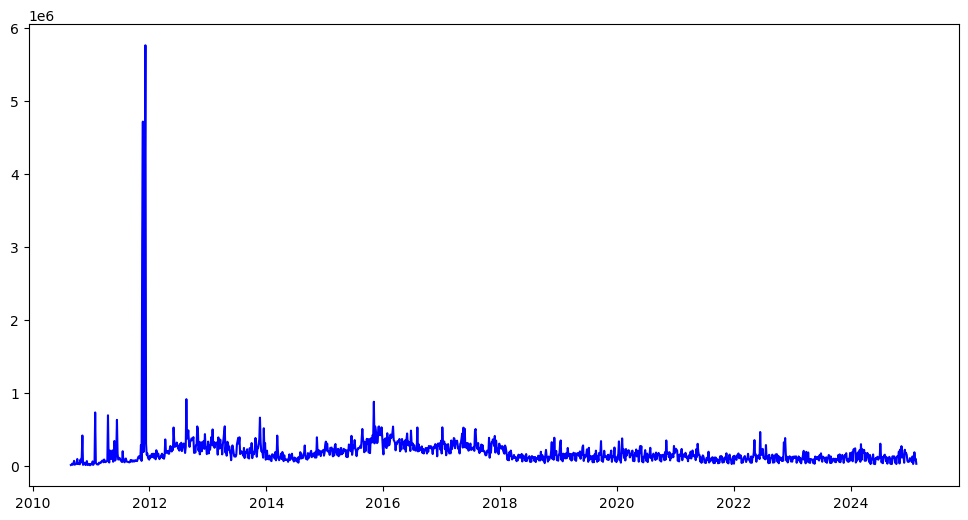

In [15]:
# Plot transaction volume with annotations
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['TransactionVolume'], label='Bitcoin Transaction Volume', color='blue')

In [17]:
# Annotate halving events
for date in halving_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), max(df['TransactionVolume']), ' Halving', rotation=90, verticalalignment='top')

plt.title('Bitcoin Transaction Volume with Halving Events')
plt.xlabel('Date')
plt.ylabel('Transaction Volume (USD)')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Image size of 567x2128841784 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>